In [95]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [96]:
IMAGE_SIZE = 256
CHANNELS = 3

In [99]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'dataset/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
)

Found 14440 images belonging to 15 classes.


In [100]:
train_generator.class_indices

{'Pepper__bell___Bacterial_spot': 0,
 'Pepper__bell___healthy': 1,
 'Potato___Early_blight': 2,
 'Potato___Late_blight': 3,
 'Potato___healthy': 4,
 'Tomato_Bacterial_spot': 5,
 'Tomato_Early_blight': 6,
 'Tomato_Late_blight': 7,
 'Tomato_Leaf_Mold': 8,
 'Tomato_Septoria_leaf_spot': 9,
 'Tomato_Spider_mites_Two_spotted_spider_mite': 10,
 'Tomato__Target_Spot': 11,
 'Tomato__Tomato_YellowLeaf__Curl_Virus': 12,
 'Tomato__Tomato_mosaic_virus': 13,
 'Tomato_healthy': 14}

In [101]:
class_names = list(train_generator.class_indices.keys())
class_names

['Pepper__bell___Bacterial_spot',
 'Pepper__bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [102]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break

[[[0.39578107 0.37617323 0.46244773]
  [0.35277736 0.33316952 0.41944402]
  [0.3130928  0.29348496 0.3797595 ]
  ...
  [0.5154104  0.5075673  0.59384185]
  [0.50242287 0.49457976 0.58085424]
  [0.48943532 0.48159218 0.5678667 ]]

 [[0.39543006 0.37582222 0.46209672]
  [0.35698953 0.3373817  0.4236562 ]
  [0.31660295 0.2969951  0.38326964]
  ...
  [0.61793834 0.6100952  0.6963697 ]
  [0.634787   0.6269439  0.7132184 ]
  [0.65163577 0.6437926  0.73006713]]

 [[0.39507905 0.3754712  0.4617457 ]
  [0.36120173 0.3415939  0.4278684 ]
  [0.3201131  0.30050525 0.3867798 ]
  ...
  [0.6001817  0.59233856 0.67861307]
  [0.59210837 0.58426523 0.67053974]
  [0.584035   0.57619184 0.66246635]]

 ...

 [[0.3360396  0.32819647 0.4223141 ]
  [0.35148427 0.34364113 0.4377588 ]
  [0.36692896 0.35908583 0.45320347]
  ...
  [0.4110971  0.41501868 0.5248226 ]
  [0.4650384  0.46895996 0.57876384]
  [0.25405487 0.25797644 0.36778036]]

 [[0.4850365  0.47719336 0.571311  ]
  [0.47485703 0.4670139  0.5611316 ]


In [130]:
count=0
for image_batch, label_batch in train_generator:
    print(label_batch)
   # print(image_batch[0])
    break

[ 6.  6. 12. 12. 10.  9. 10.  6. 11.  6.  8.  5.  5.  0.  6. 10.  9.  7.
  5.  9. 12. 10.  5. 12.  6.  5.  5.  5.  2.  0. 10.  5.]


In [103]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'dataset/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 2058 images belonging to 15 classes.


In [104]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 4140 images belonging to 15 classes.


In [127]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.67347693 0.6499475  0.69700634]
  [0.49498582 0.4714564  0.5185152 ]
  [0.63928264 0.61575323 0.66281205]
  ...
  [0.5999841  0.57253313 0.6039057 ]
  [0.55313194 0.52568096 0.5570535 ]
  [0.5334128  0.50596184 0.5373344 ]]

 [[0.4206249  0.3970955  0.44415432]
  [0.52881736 0.50528795 0.55234677]
  [0.8018359  0.7783065  0.8253653 ]
  ...
  [0.47877488 0.4513239  0.48269644]
  [0.5448634  0.5174124  0.548785  ]
  [0.7278796  0.7004286  0.73180115]]

 [[0.67065185 0.6471224  0.69418126]
  [0.49091586 0.46738645 0.51444525]
  [0.5575784  0.534049   0.5811078 ]
  ...
  [0.33772397 0.310273   0.34164554]
  [0.4781375  0.4506865  0.48205906]
  [0.44443452 0.41698354 0.4483561 ]]

 ...

 [[0.5467001  0.4957197  0.53101385]
  [0.58980393 0.53882354 0.57411766]
  [0.63851005 0.58752966 0.6228238 ]
  ...
  [0.34222016 0.29123977 0.32653388]
  [0.5521685  0.5011881  0.5364822 ]
  [0.57969296 0.5287126  0.5640067 ]]

 [[0.89701873 0.84603834 0.88133246]
  [0.92626137 0.875281   0.9105751 ]


In [110]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 15

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [111]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)


In [112]:
history = model.fit(
    train_generator,
    steps_per_epoch=451,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=64,
    verbose=1,
    epochs=5,
)

Epoch 1/5
451/451 [==============================] - 1024s 2s/step - loss: 1.3035 - accuracy: 0.5806 - val_loss: 0.7212 - val_accuracy: 0.7598
Epoch 2/5
451/451 [==============================] - 967s 2s/step - loss: 0.6301 - accuracy: 0.7898 - val_loss: 0.6047 - val_accuracy: 0.8003
Epoch 3/5
451/451 [==============================] - 987s 2s/step - loss: 0.4646 - accuracy: 0.8435 - val_loss: 0.5210 - val_accuracy: 0.8145
Epoch 4/5
451/451 [==============================] - 972s 2s/step - loss: 0.3427 - accuracy: 0.8848 - val_loss: 0.3823 - val_accuracy: 0.8638
Epoch 5/5
451/451 [==============================] - 974s 2s/step - loss: 0.2767 - accuracy: 0.9051 - val_loss: 0.5013 - val_accuracy: 0.8447


In [113]:
scores = model.evaluate(test_generator)

130/130 [==============================] - 126s 969ms/step - loss: 0.4912 - accuracy: 0.8486


In [118]:
history

In [119]:
history.params

{'verbose': 1, 'epochs': 5, 'steps': 451}

In [120]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [121]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

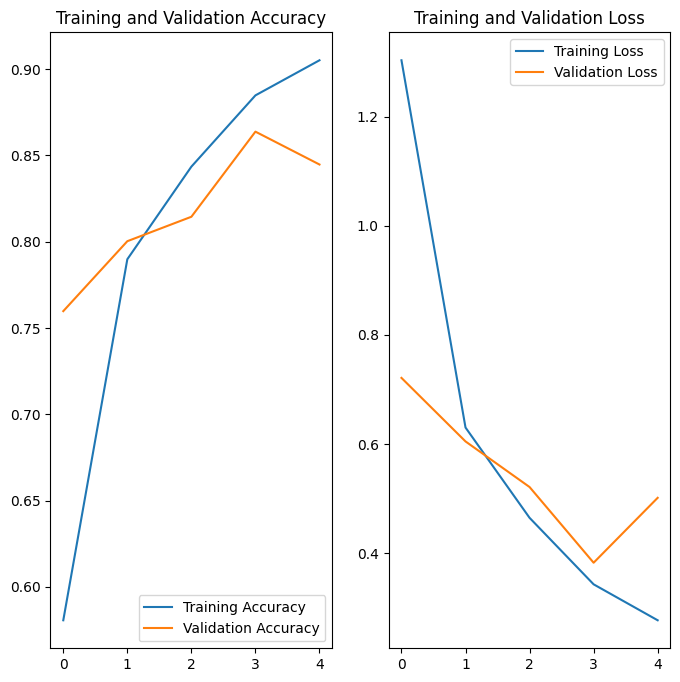

In [122]:
EPOCHS = 5

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Pepper__bell___healthy
1/1 [==============================] - 0s 321ms/step
predicted label: Pepper__bell___healthy


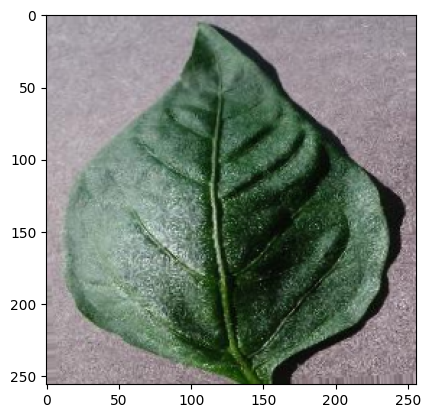

In [133]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

In [124]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 32ms/step


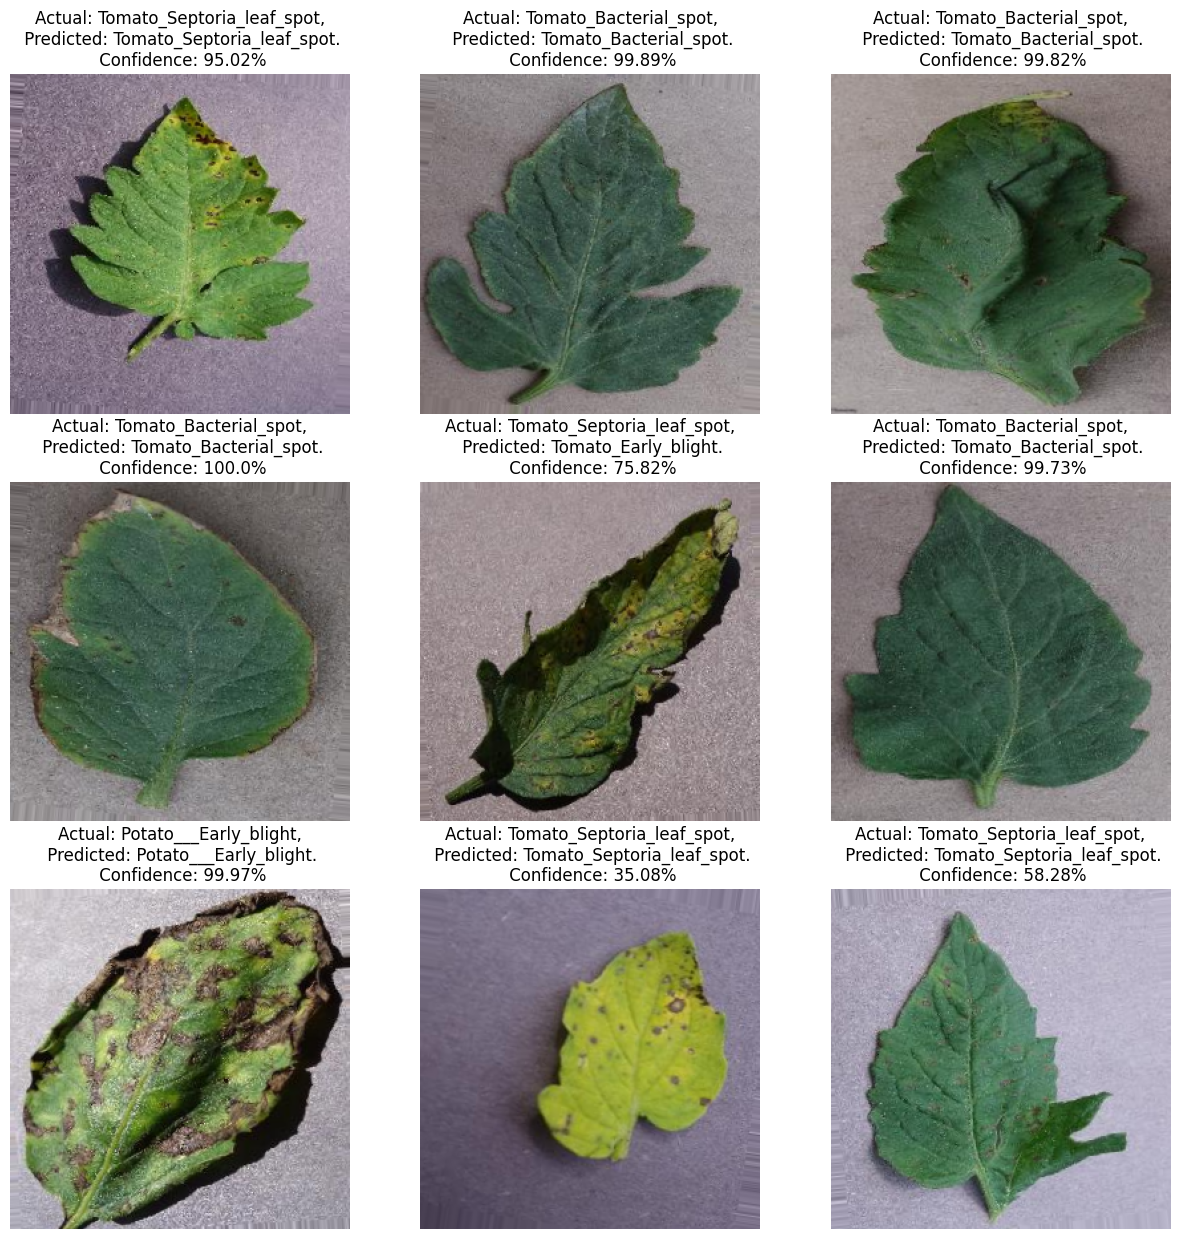

In [125]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [126]:
model_version=5
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/5\assets


INFO:tensorflow:Assets written to: ../models/5\assets
